In [28]:
# Import Neccessary libraries
import numpy as np
import pandas as pd


# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import  LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression




#import warning libraries
import warnings

warnings.filterwarnings('ignore')

In [30]:
# loading the dataset :
diabetes_df = pd.read_csv('../Datasets/diabetes_dataset.csv')

diabetes_df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

# EDA 

In [33]:
print(f"Df Shape : {diabetes_df.shape}")

Data Shape : (100000, 9)


In [35]:
# information on columns :
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
# check for duplicated values:
print(f"Duplicated Rows :{diabetes_df.duplicated().sum()}")

# Droping duplicated values:
diabetes_df = diabetes_df.drop_duplicates()

# after dropping duplicated values :
print(f"Duplicated Rows :{diabetes_df.duplicated().sum()}")

Duplicated Rows :3854
Duplicated Rows :0


In [39]:
#checking for missing values :
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [41]:
print(f"Df Shape : {diabetes_df.shape}")

Df Shape : (96146, 9)


In [43]:
#count the unique values in diabetes column(Target)
diabetes_df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

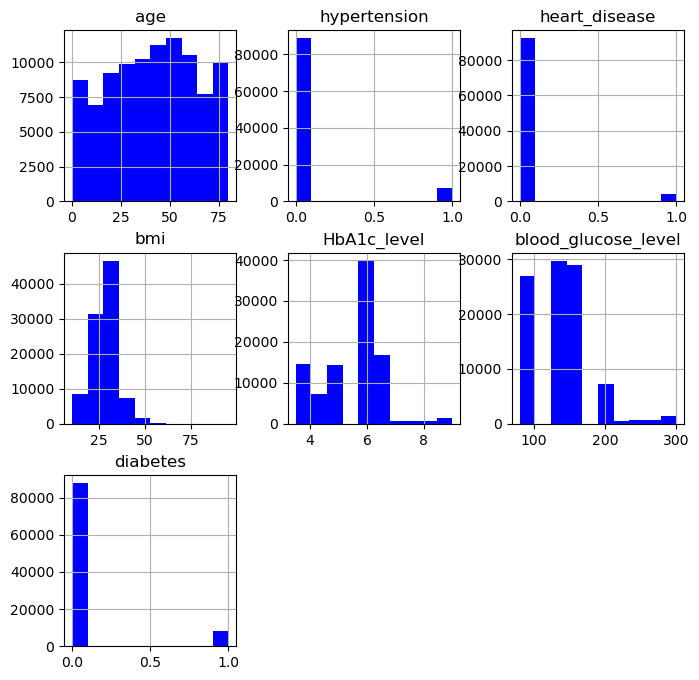

In [51]:
diabetes_df.hist(figsize=(8,8), color='blue')

Text(0.5, 1.0, 'Countplot for gender')

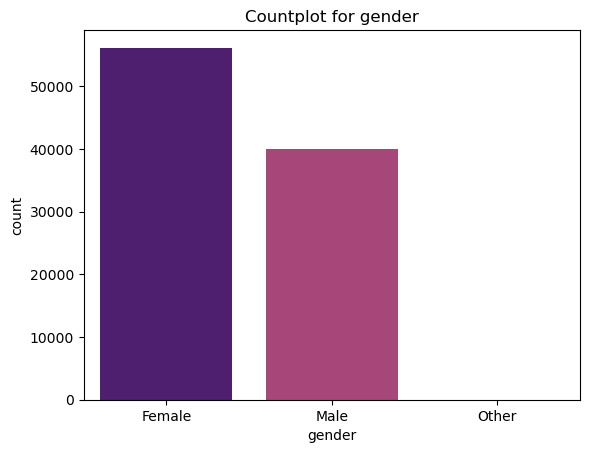

In [61]:
# Countplot for column gender
sns.countplot(x = diabetes_df['gender'], data = diabetes_df , palette='magma' )
plt.title("Countplot for gender")

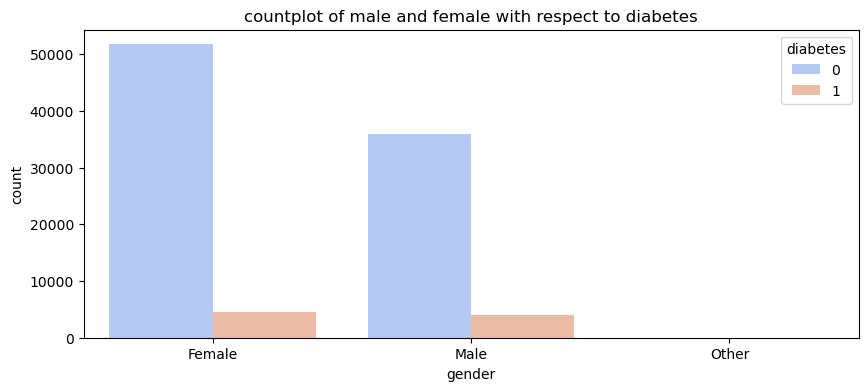

In [69]:
plt.figure(figsize=(10, 4))

sns.countplot(x = diabetes_df['gender'], hue = diabetes_df['diabetes'], data = diabetes_df ,palette='coolwarm' )

plt.title('countplot of male and female with respect to diabetes')

plt.show()

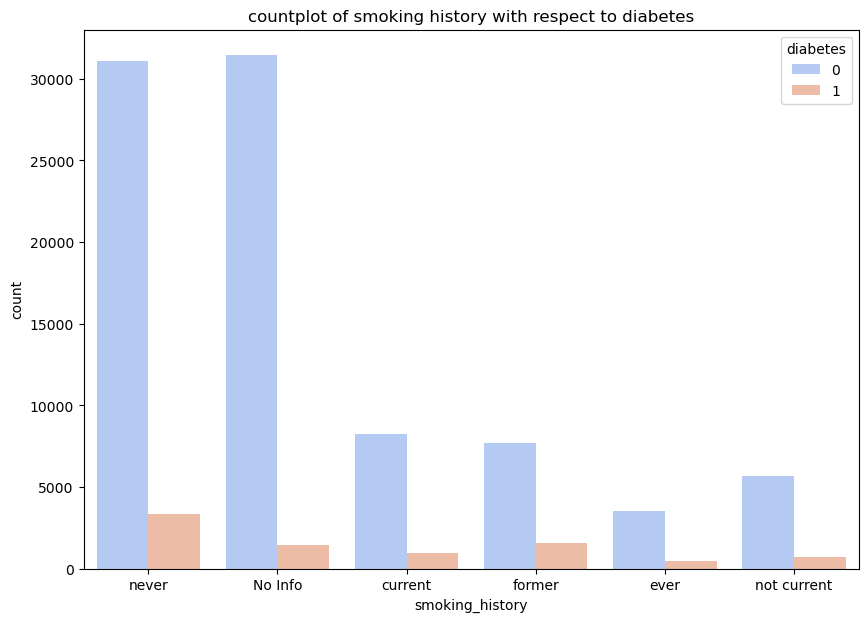

In [67]:
plt.figure(figsize=(10, 7))

sns.countplot(x = diabetes_df['smoking_history'], hue = diabetes_df['diabetes'], data = diabetes_df ,palette='coolwarm' )

plt.title('countplot of smoking history with respect to diabetes')

plt.show()

In [71]:
#converting categorical data into numerical data

encoder = LabelEncoder()

diabetes_df['gender'] = encoder.fit_transform(diabetes_df['gender'])

diabetes_df['smoking_history'] = encoder.fit_transform(diabetes_df['smoking_history'])

In [77]:
diabetes_df.to_csv('diabetes_num.csv',index = False)